### GridSearch
관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하며 최적의 하이퍼 파라미터 튜닝을 하는 것  

</br>
예시 모델 : SVM   

하이퍼 파라미터 : gamma, C

In [1]:
# GridSearch basic
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
print("훈련 세트의 크기: {0}  테스트 세트의 크기 {1}".format(X_train.shape, X_test.shape))

훈련 세트의 크기: (120, 4)  테스트 세트의 크기 (30, 4)


In [2]:
best_score = 0

# 예측 점수 list
scores = []

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC 학습
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가함
        score = svm.score(X_test, y_test)
        scores.append(score)
        # best score / best params 저장
        if score > best_score:
            best_score = score
            best_params = {"gamma": gamma, "C": C}
print(scores)

[0.2, 0.2, 0.2, 0.5666666666666667, 0.9333333333333333, 1.0, 0.2, 0.2, 0.5666666666666667, 0.9333333333333333, 1.0, 1.0, 0.2, 0.2, 0.9333333333333333, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 0.23333333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.2, 0.2, 0.2, 0.36666666666666664, 0.43333333333333335, 0.43333333333333335]


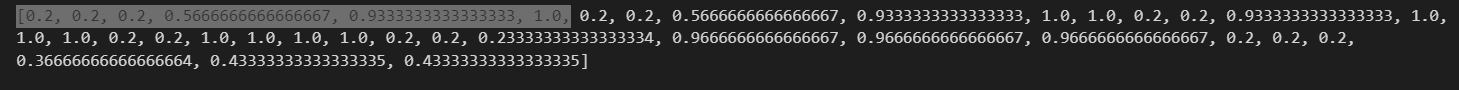  

gamma for문을 돌때마다 새로운 모델을 선언해 6개씩(하이퍼파라미터 수) 점점 정확도가 좋아지는 것을 볼 수 있다.  
과대 적합된 것!

In [3]:
# for문으로 모델을 돌리면서 이미 테스트 데이터를 사용했기 때문에 모델의 정확도가 1.0까지 올라감
print(best_score)
print(best_params)

1.0
{'gamma': 0.001, 'C': 100}


In [4]:
# train, validation, test 데이터 셋 분리
from sklearn.svm import SVC
# train test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
# train val 셋 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

print("훈련세트의 크기: {0}  검증 세트의 크기: {1}  테스트 세트의 크기: {2}\n".format(X_tr.shape, X_val.shape, X_test.shape))

훈련세트의 크기: (108, 4)  검증 세트의 크기: (12, 4)  테스트 세트의 크기: (30, 4)



In [5]:
best_score = 0

# 예측 점수 list
scores = []

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC 학습
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_tr, y_tr)
        # 테스트 세트로 SVC를 평가함
        score = svm.score(X_val, y_val)
        scores.append(score)
        # best score / best params 저장
        if score > best_score:
            best_score = score
            best_params = {"gamma": gamma, "C": C}
print(scores)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ", best_params)

[0.25, 0.25, 0.25, 0.6666666666666666, 1.0, 1.0, 0.25, 0.25, 0.6666666666666666, 1.0, 1.0, 1.0, 0.25, 0.25, 1.0, 1.0, 1.0, 1.0, 0.25, 0.25, 1.0, 1.0, 1.0, 0.9166666666666666, 0.25, 0.25, 0.25, 1.0, 1.0, 1.0, 0.25, 0.25, 0.25, 0.5, 0.5833333333333334, 0.5833333333333334]
검증 세트에서 최고 점수: 1.00
최적 매개변수:  {'gamma': 0.001, 'C': 10}


In [11]:
# 테스트 셋에서 평가하기
svm = SVC(**best_params)
svm.fit(X_train, y_train) # 학습시킬땐 데이터 전부 (X_tr + X_val)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ", best_params)
print("최적 매개변수에서 테스트 셋 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 1.00
최적 매개변수:  {'gamma': 0.001, 'C': 10}
최적 매개변수에서 테스트 셋 점수: 0.93


[결론]
실제 모델의 성능은 0.93에 그치는 것이고, 그때의 최적 매개변수는 gamma : 0.001, C : 10이다.

### GridSearchCV
교차 검증을 포함한 매개변수 조합의 성능 평가하는 모델

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
best_score = 0

# 경우의 수 : 6*6*5=180
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC 학습
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증 적용 (5개의 fold로 나눔)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        # 교차 검증 정확도의 평균을 계산
        score_mean = np.mean(scores)
        # best score / best params 저장
        if score_mean > best_score:
            best_score = score_mean
            best_params = {"gamma": gamma, "C": C}

print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ", best_params)

검증 세트에서 최고 점수: 0.96
최적 매개변수:  {'gamma': 0.001, 'C': 100}


In [13]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듦
svm = SVC(**best_params)
svm.fit(X_train, y_train)
test_score = svm.score(X_test, y_test)
print("최적 매개변수에서 테스트 셋 점수: {:.2f}".format(test_score))

최적 매개변수에서 테스트 셋 점수: 1.00


### GridSearchCV 모델 사용

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 모델 선언
svm = SVC()

# 파라미터를 딕셔너리로 저장
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid)
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, return_train_score=True)

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [23]:
# 과대 적합되지 않기 위해서 train test 나누기
# cross validation할거니까 직접 validation 나눠줄 필요없음
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
score = grid_search.score(X_test, y_test)
print("검증 세트 점수: {:.2f}".format(score))

검증 세트 점수: 0.97


In [24]:
# 최적의 매개변수로 모델 학습 및 평가
svm = SVC(**grid_search.best_params_)
svm.fit(X_train, y_train)
final_score = svm.score(X_test, y_test)
print("테스트 세트 점수: {:.2f}".format(final_score))

테스트 세트 점수: 0.97


In [25]:
print(grid_search.best_estimator_)

SVC(C=10, gamma=0.1)
